In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from genCo import getGenCos, plotResults 
from main import getFutureData
from utilsData import fuelDict, getISO

In [2]:
dfISO, numGenerators, totalCap, totalCSO = getISO()

Total Capacity:  38389.70230400001 Number of Generators:  2585


In [3]:
cap_rate = 1.0
# fuelMappingDict = dict(zip(dfISO['Technology'].tolist(), dfISO['Energy Source Code'].tolist()))
genCos = getGenCos(numGenerators, dfISO)
dfCSO = pd.read_csv('data/CSO2023.csv', skiprows=0, index_col=None)

{'LandFill Gas': 0.0, 'Gas': 17494.84500000001, 'Hydro': 3385.012999999998, 'Oil': 3189.3289999999993, 'Refuse/Woods': 0.0, 'Coal': 438.0, 'Nuclear': 3333.1130000000003, 'Wind': 559.6179999999999, 'Gas-Other': 0.0, 'Solar': 29.560000000000045, 'Other': 25.722999999999992}
{'LandFill Gas': 96.12375, 'Gas': 18074.166368999995, 'Hydro': 3747.6769149999986, 'Oil': 6789.64676, 'Refuse/Woods': 1122.8823899999998, 'Coal': 651.83545, 'Nuclear': 3606.65085, 'Wind': 1491.2266999999995, 'Gas-Other': 16.106, 'Solar': 2617.8115199999884, 'Other': 175.5756}
{'LandFill Gas': 0.0, 'Gas': 17370.791999999987, 'Hydro': 3217.5180000000005, 'Oil': 3196.8619999999987, 'Refuse/Woods': 0.0, 'Coal': 438.0, 'Nuclear': 3333.1130000000003, 'Wind': 270.218, 'Gas-Other': 0.0, 'Solar': 401.54499999999973, 'Other': 25.37800000000001}
{'LandFill Gas': 96.12375, 'Gas': 18074.166368999995, 'Hydro': 3747.6769149999986, 'Oil': 6789.64676, 'Refuse/Woods': 1122.8823899999998, 'Coal': 651.83545, 'Nuclear': 3606.65085, 'Wind'

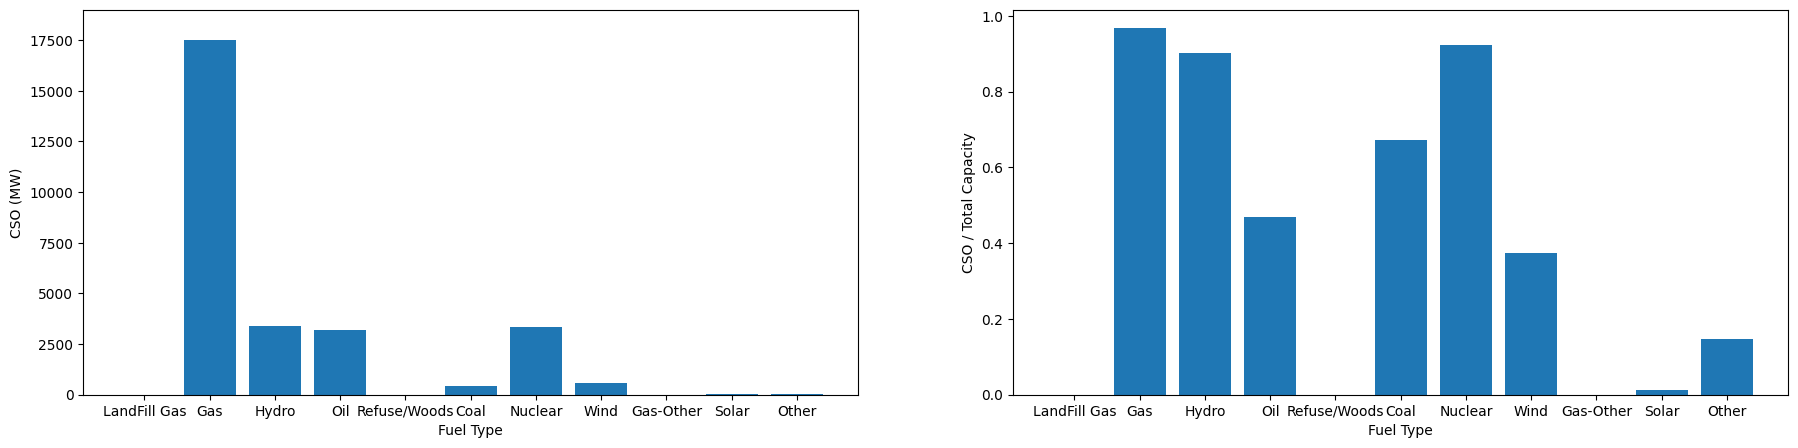

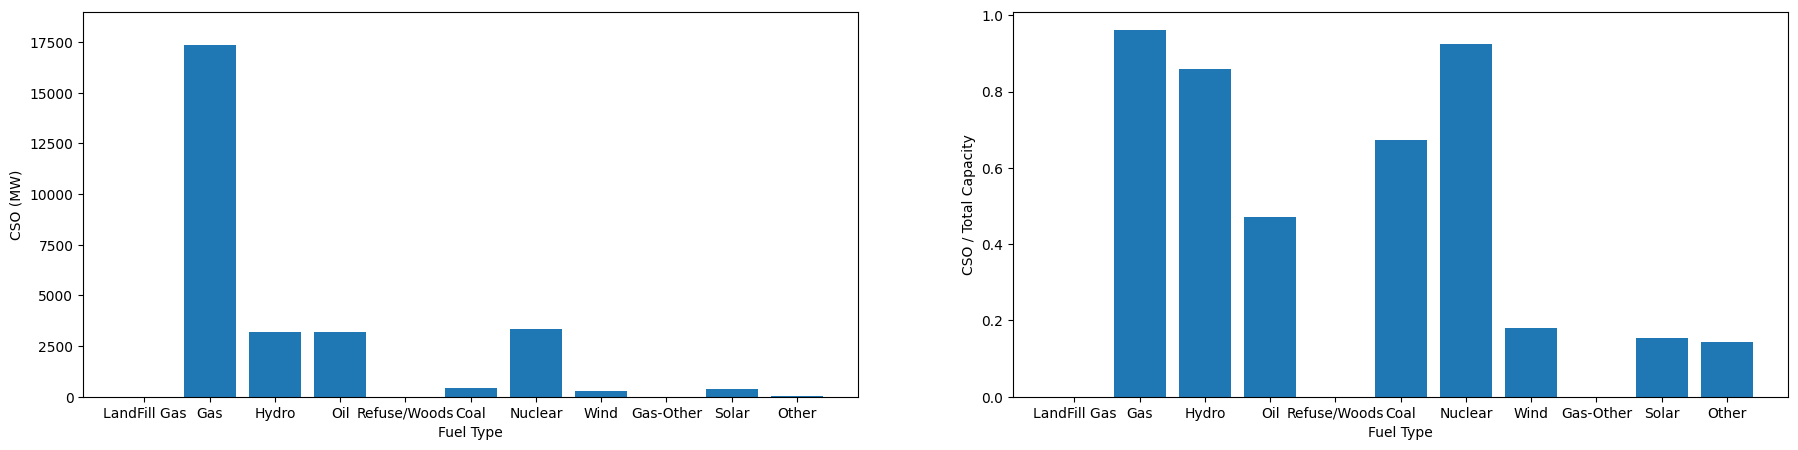

In [5]:
for month in ['January', 'July']:
    for gen in genCos: gen.updateCSO(dfCSO, dfISO, cap_rate, [1, 1], month);
    
    plt.figure(figsize=(22, 5))
    plt.subplot(1, 2, 1)
    csoHist = {}
    for genco in genCos:
        temp = genco.CapObl

        if genco.fuelType in csoHist:
            csoHist[genco.fuelType] += temp
        else:
            csoHist[genco.fuelType] = temp
    print(csoHist)

    labels = list(csoHist.keys())
    weights = list(csoHist.values())

    plt.bar(labels, weights)
    plt.xlabel('Fuel Type')
    plt.ylabel('CSO (MW)');
    plt.ylim(0, 19000)

    plt.subplot(1, 2, 2)
    capHist = {}
    for genco in genCos:
        temp = genco.MaxCap

        if genco.fuelType in capHist:
            capHist[genco.fuelType] += temp
        else:
            capHist[genco.fuelType] = temp
    print(capHist)

    # del capHist['Other']; del csoHist['Waste']
    # del csoHist['Other']; del capHist['Waste']
    labels = list(csoHist.keys())
    weights = list(csoHist.values())
    labels2 = list(capHist.keys())
    weights2 = list(capHist.values())

    plt.bar(labels2, np.array(weights) / np.array(weights2))
    # plt.ylim(0, 19000)
    plt.xlabel('Fuel Type')
    plt.ylabel('CSO / Total Capacity');

In [6]:
__, __, __, dfISO, info = getFutureData(ISO='ISNE', verbose=False, path='data/forecast/' , 
                                                                        load_rate='high', vre_mix='high')
numGenerators, totalCap, adjRatios, cap_rate, LOLE = info[0][0], info[1][0], info[2], info[3][0], info[4][0]
genCos = getGenCos(numGenerators, dfISO)
dfCSO = pd.read_csv('data/CSO2023.csv', skiprows=0, index_col=None)

{'LandFill Gas': 0.0, 'Gas': 14106.137518993586, 'Hydro': 2729.3444944257, 'Oil': 2571.5639931256446, 'Refuse/Woods': 0.0, 'Coal': 353.16050146881474, 'Nuclear': 2687.4973939091915, 'Wind': 8783.660073196621, 'Gas-Other': 0.0, 'Solar': 463.96826364357776, 'Other': 20.740519587402567}
{'LandFill Gas': 77.5048213540251, 'Gas': 14573.245795677698, 'Hydro': 3021.7613211061675, 'Oil': 5474.5092569810795, 'Refuse/Woods': 905.3828948468066, 'Coal': 525.5765625505721, 'Nuclear': 2908.0516502486926, 'Wind': 23406.01700601972, 'Gas-Other': 12.986308302869253, 'Solar': 41088.682864700815, 'Other': 141.56704781207318}
{'LandFill Gas': 0.0, 'Gas': 14006.113273128945, 'Hydro': 2594.292854714473, 'Oil': 2577.6378699694023, 'Refuse/Woods': 0.0, 'Coal': 353.16050146881474, 'Nuclear': 2687.4973939091915, 'Wind': 4241.291483939121, 'Gas-Other': 0.0, 'Solar': 6302.575657129946, 'Other': 20.462345219807272}
{'LandFill Gas': 77.5048213540251, 'Gas': 14573.245795677698, 'Hydro': 3021.7613211061675, 'Oil': 54

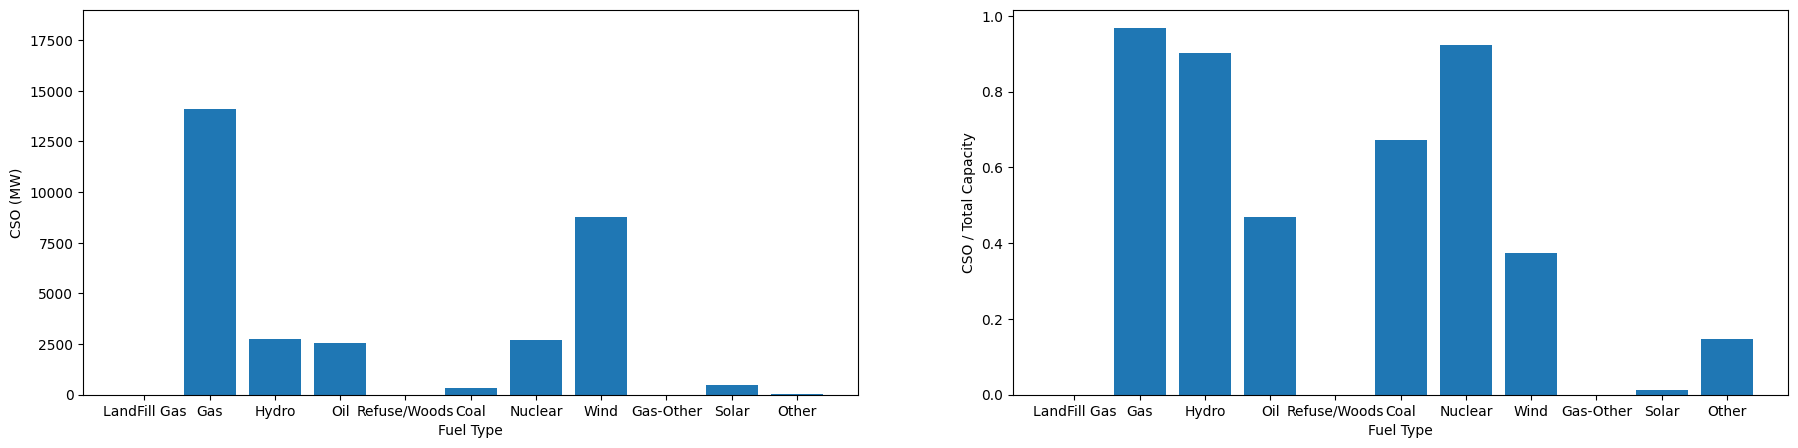

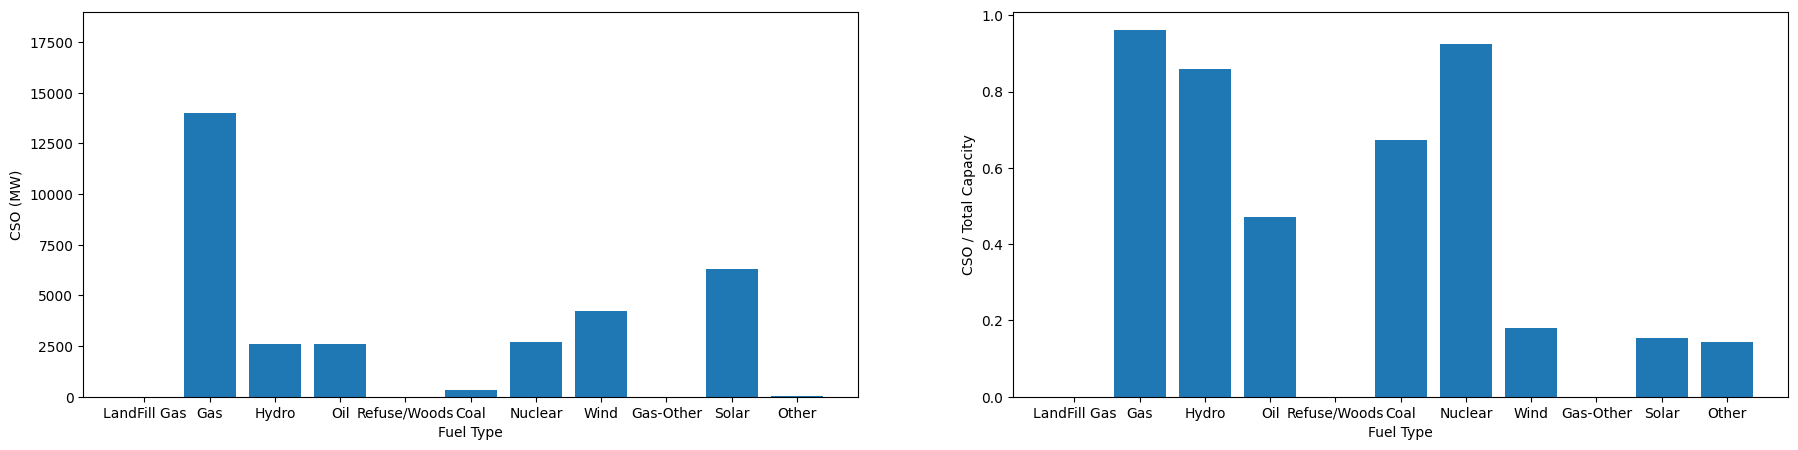

In [8]:
for month in ['January', 'July']:    
    for gen in genCos: gen.updateCSO(dfCSO, dfISO, cap_rate, adjRatios, month);

    plt.figure(figsize=(22, 5))
    plt.subplot(1, 2, 1)
    csoHist = {}
    for genco in genCos:
        temp = genco.CapObl

        if genco.fuelType in csoHist:
            csoHist[genco.fuelType] += temp
        else:
            csoHist[genco.fuelType] = temp
    print(csoHist)

    labels = list(csoHist.keys())
    weights = list(csoHist.values())

    plt.bar(labels, weights)
    plt.xlabel('Fuel Type')
    plt.ylabel('CSO (MW)');
    plt.ylim(0, 19000)

    plt.subplot(1, 2, 2)
    capHist = {}
    for genco in genCos:
        temp = genco.MaxCap

        if genco.fuelType in capHist:
            capHist[genco.fuelType] += temp
        else:
            capHist[genco.fuelType] = temp
    print(capHist)

    # del capHist['Other']; del csoHist['Waste']
    # del csoHist['Other']; del capHist['Waste']
    labels = list(csoHist.keys())
    weights = list(csoHist.values())
    labels2 = list(capHist.keys())
    weights2 = list(capHist.values())

    plt.bar(labels2, np.array(weights) / np.array(weights2))
    # plt.ylim(0, 19000)
    plt.xlabel('Fuel Type')
    plt.ylabel('CSO / Total Capacity');

In [8]:
import datetime

def plotData(dfHourlyLoad, dfHourlySolar, dfHourlyWind, totalCap, totalCSO, yearPlot="2023"):
    month, day, year = map(int,dfHourlyLoad.loc[0]['Date'].split('/'))
    start = datetime(year, month, day, int(dfHourlyLoad.loc[0]['Hour Ending']) - 1)
    month, day, year = map(int,dfHourlyLoad.loc[len(dfHourlyLoad) - 1]['Date'].split('/'))
    end =  datetime(year, month, day, int(dfHourlyLoad.loc[len(dfHourlyLoad) - 1]['Hour Ending']) - 1)

    timeRange = pd.date_range(start, end, periods=len(dfHourlyLoad))


    plt.plot(timeRange, dfHourlyLoad['Total Load'], label='Total Load')
    plt.plot(timeRange, dfHourlySolar['tot_solar_mwh'], label='Solar')
    plt.plot(timeRange, dfHourlyWind['tot_wind_mwh'], label='Wind')
    plt.plot(timeRange, totalCap * np.ones(len(dfHourlyLoad)), 'k--', label='Total Capacity')
    plt.plot(timeRange, totalCSO * np.ones(len(dfHourlyLoad)), 'k--', label='Total CSO')

    plt.xlabel('Date')
    plt.ylabel('Load (MW)')
    plt.title('Hourly Load of ' + yearPlot)
    plt.legend()

In [9]:
dfISO = pd.read_csv('data/CELT2023.csv')

In [10]:
dfISO

,Unnamed: 0,ASSET ID,ASSET NAME,RESOURCE ID,Fuel Type,RESOURCE NAME,GENERATOR TYPE,Primary Fuel Type,ALT FUEL TYPE,EIA PLANT NUMBER,Nameplate Capacity (MW)
0,0,253,TURNKEY LANDFILL,253.0,Gas,TURNKEY LANDFILL,INTERNAL COMBUSTION,LFG,NaN,54663,3.0000
1,1,321,MANCHESTER 10/10A CC,321.0,Gas,MANCHESTER 10 10A CC,COMBINED CYCLE,NG,DFO,3236,170.1995
2,2,322,MANCHESTER 11/11A CC,322.0,Gas,MANCHESTER 11 11A CC,COMBINED CYCLE,NG,DFO,3236,170.1995
3,3,323,MANCHESTER 9/9A CC,323.0,Gas,MANCHESTER 9 9A CC,COMBINED CYCLE,NG,DFO,3236,170.1995
4,4,326,ALTRESCO,326.0,Gas,ALTRESCO,COMBINED CYCLE,NG,DFO,50002,160.0880
...,...,...,...,...,...,...,...,...,...,...,...
2580,2580,73793,GREEN02703SOLAR1080QF,NaN,Solar,NO RESOURCE,PHOTOVOLTAIC,SUN,NaN,NaN,1.0800
2581,2581,73796,MELROSESCH02835SOLAR150NM,NaN,Solar,NO RESOURCE,PHOTOVOLTAIC,SUN,NaN,NaN,0.1500
2582,2582,73804,OSJLHOPEVLY02898SOLAR199RE,NaN,Solar,NO RESOURCE,PHOTOVOLTAIC,SUN,NaN,NaN,0.1990
2583,2583,73805,PARSON01581SOLAR150QF,NaN,Solar,NO RESOURCE,PHOTOVOLTAIC,SUN,NaN,NaN,0.1500


In [11]:
fuelDict = {'LFG': 'LandFill Gas', 'NG': 'Gas', 'DFO': 'Oil', 'KER': 'Oil',\
            'WDS':'Refuse/Woods', 'BIT':'Coal', 'MSW' : 'Refuse/Woods', \
            'JF':'Oil', 'RFO' : 'Oil',
            'WAT':'Hydro', 'NUC':'Nuclear', 'WND':'Wind', 'SUN':'Solar',\
            'OBG': 'Gas-Other', 'MWH': 'Other'}

{'LandFill Gas': 96.12375, 'Gas': 18074.166368999995, 'Hydro': 3747.6769149999986, 'Oil': 6789.64676, 'Refuse/Woods': 1122.8823899999998, 'Coal': 651.83545, 'Nuclear': 3606.65085, 'Wind': 1491.2266999999995, 'Gas-Other': 16.106, 'Solar': 2617.8115199999884, 'Other': 175.5756}
['LandFill Gas', 'Gas', 'Hydro', 'Oil', 'Refuse/Woods', 'Coal', 'Nuclear', 'Wind', 'Gas-Other', 'Solar', 'Other']


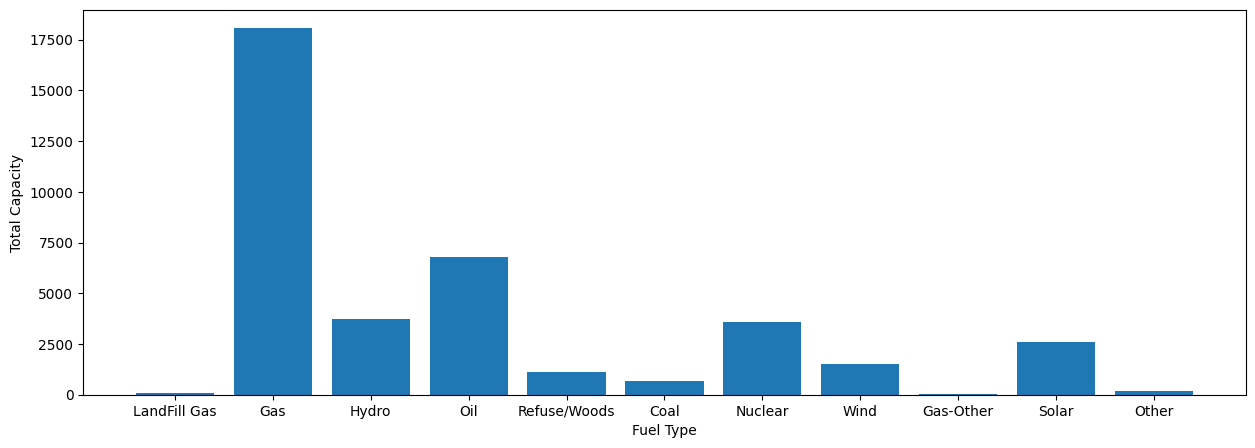

In [12]:
for month in ['January']:    
    plt.figure(figsize=(15, 5))
    capHist = {}
    for i in range(len(dfISO)):
        genco = dfISO.iloc[i]
        temp = genco['Nameplate Capacity (MW)']

        fuelType = fuelDict[genco['Primary Fuel Type']]
        # fuelType = genco['Primary Fuel Type']


        if fuelType in capHist:
            capHist[fuelType] += temp
        else:
            capHist[fuelType] = temp
    print(capHist)

    # del capHist['Other']; del csoHist['Waste']
    # del csoHist['Other']; del capHist['Waste']
    labels = list(csoHist.keys())
    weights = list(csoHist.values())
    labels2 = list(capHist.keys())
    weights2 = list(capHist.values())
    print(labels2)
    plt.bar(labels2, np.array(weights2))
    # plt.ylim(0, 19000)
    plt.xlabel('Fuel Type')
    plt.ylabel('Total Capacity');